In [9]:
# load dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Load data and select trainging hour and test hour
df = pd.read_csv('series.csv')
cols5 = ['21', '22', '23', '24', '25']
cols10 = ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
df['sum5'] = df[cols5].sum(axis=1)
df['sum10'] = df[cols10].sum(axis=1)

trainhour = 6
testhour = 8
testdata = df.drop(df[(df['hour'] != testhour)].index)
data = df.drop(df[(df['hour'] != trainhour)].index)
del df

# Set clusters
k = 6

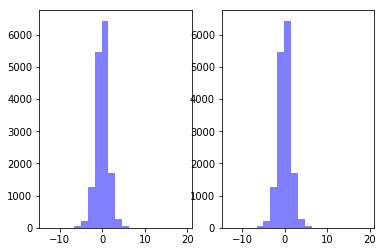

In [11]:
# Plot Histograms
plt.subplot(1,2,1)
plt.hist(data["Change"], 20, facecolor='blue', alpha=0.5)
plt.subplot(1,2,2)
plt.hist(data["Change"], 20, facecolor='blue', alpha=0.5)
plt.show()

In [12]:
# Create model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k)

In [13]:
# Get data and fit model
X = data.iloc[:,8:28].to_numpy()
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Get group assignments for fitted data and test data
data["fit"] = kmeans.labels_
X_test = testdata.iloc[:,8:28].to_numpy()
testdata['fit'] = kmeans.fit_predict(X_test)

In [15]:
# Group by to summarize on the assigned ('fit') column
data_group = data.groupby('fit').agg(['sum','count', 'min', 'max'])
test_group = testdata.groupby('fit').agg(['sum','count', 'min', 'max'])

In [16]:
# Combine and print summary by group
result = pd.concat([data_group['sum10'], test_group['sum10']], axis=1, sort=False)
result

,sum,count,min,max,sum,count,min,max
fit,,,,,,,,
0,-839.0,2580,-16.9,20.0,173.9,2477,-95.0,45.9
1,-101.9,2634,-21.1,34.6,-290.6,2699,-45.0,49.8
2,195.0,2640,-16.5,22.9,549.4,2515,-45.4,48.0
3,319.4,2580,-17.5,24.2,123.7,2630,-51.1,50.2
4,-1734.5,2580,-25.7,20.2,426.1,2726,-33.0,54.4
5,-778.9,2520,-21.2,32.9,461.3,2479,-43.5,48.1
